In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
veriler = pd.read_csv('iris.csv')

In [9]:
ilk_bes_satir = veriler.head()

print(ilk_bes_satir)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [10]:
eksik_veri_sayisi = veriler.isnull().sum()

print(eksik_veri_sayisi)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
gruplu_sayim = veriler.groupby(["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]).size()
print(gruplu_sayim)

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species       
1    5.1            3.5           1.4            0.2           Iris-setosa       1
2    4.9            3.0           1.4            0.2           Iris-setosa       1
3    4.7            3.2           1.3            0.2           Iris-setosa       1
4    4.6            3.1           1.5            0.2           Iris-setosa       1
5    5.0            3.6           1.4            0.2           Iris-setosa       1
                                                                                ..
146  6.7            3.0           5.2            2.3           Iris-virginica    1
147  6.3            2.5           5.0            1.9           Iris-virginica    1
148  6.5            3.0           5.2            2.0           Iris-virginica    1
149  6.2            3.4           5.4            2.3           Iris-virginica    1
150  5.9            3.0           5.1            1.8           Iris-virginica    1
Length: 1

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
veriler['sayisal_etiket'] = label_encoder.fit_transform(veriler['Species'])


print(veriler[['Species', 'sayisal_etiket']].head())

       Species  sayisal_etiket
0  Iris-setosa               0
1  Iris-setosa               0
2  Iris-setosa               0
3  Iris-setosa               0
4  Iris-setosa               0


In [20]:
veriler = veriler.drop("Id", axis=1)
print(veriler)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
0              5.1           3.5            1.4           0.2     Iris-setosa   
1              4.9           3.0            1.4           0.2     Iris-setosa   
2              4.7           3.2            1.3           0.2     Iris-setosa   
3              4.6           3.1            1.5           0.2     Iris-setosa   
4              5.0           3.6            1.4           0.2     Iris-setosa   
..             ...           ...            ...           ...             ...   
145            6.7           3.0            5.2           2.3  Iris-virginica   
146            6.3           2.5            5.0           1.9  Iris-virginica   
147            6.5           3.0            5.2           2.0  Iris-virginica   
148            6.2           3.4            5.4           2.3  Iris-virginica   
149            5.9           3.0            5.1           1.8  Iris-virginica   

     sayisal_etiket  
0    

In [21]:
veriler = veriler.drop("Species", axis=1)
print(veriler)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  sayisal_etiket
0              5.1           3.5            1.4           0.2               0
1              4.9           3.0            1.4           0.2               0
2              4.7           3.2            1.3           0.2               0
3              4.6           3.1            1.5           0.2               0
4              5.0           3.6            1.4           0.2               0
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3               2
146            6.3           2.5            5.0           1.9               2
147            6.5           3.0            5.2           2.0               2
148            6.2           3.4            5.4           2.3               2
149            5.9           3.0            5.1           1.8               2

[150 rows x 5 columns]


Eğitim başarımı: 1.0
Test başarımı: 0.98


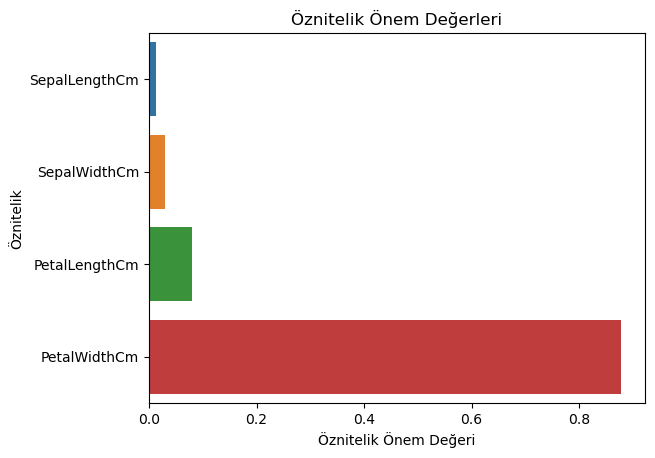

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = veriler.drop('sayisal_etiket', axis=1)
y = veriler['sayisal_etiket']
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

karar_agaci = DecisionTreeClassifier()
karar_agaci.fit(X_egitim, y_egitim)


y_egitim_tahmini = karar_agaci.predict(X_egitim)
y_test_tahmini = karar_agaci.predict(X_test)


egitim_basarimi = accuracy_score(y_egitim, y_egitim_tahmini)
test_basarimi = accuracy_score(y_test, y_test_tahmini)
print("Eğitim başarımı:", egitim_basarimi)
print("Test başarımı:", test_basarimi)


oznitelik_onemleri = karar_agaci.feature_importances_


sns.barplot(x=oznitelik_onemleri, y=X.columns)
plt.title('Öznitelik Önem Değerleri')
plt.xlabel('Öznitelik Önem Değeri')
plt.ylabel('Öznitelik')
plt.show()

In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, y_test_tahmini, average='weighted')

recall = recall_score(y_test, y_test_tahmini, average='weighted')

accuracy = accuracy_score(y_test, y_test_tahmini)

f1 = f1_score(y_test, y_test_tahmini, average='weighted')

print("Precision =", precision)
print("Recall =", recall)
print("Accuracy =", accuracy)
print("F1 Score =", f1)

Precision = 0.98125
Recall = 0.98
Accuracy = 0.98
F1 Score = 0.98


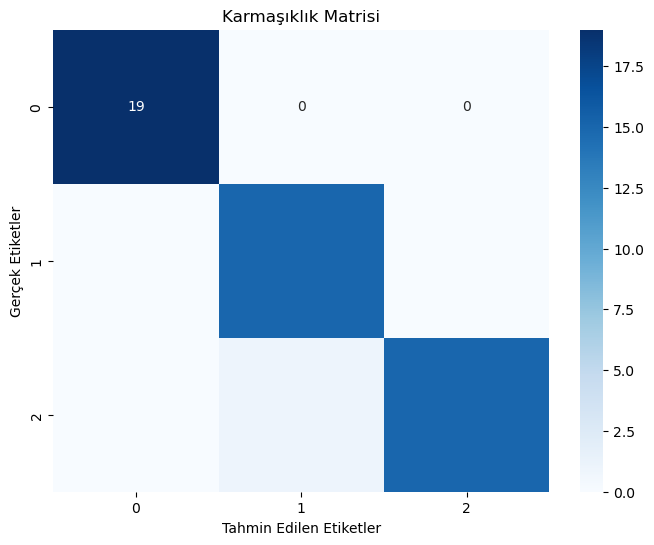

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_tahmini)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV


parametreler = {'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}


grid_search = GridSearchCV(DecisionTreeClassifier(), parametreler, cv=5, scoring='accuracy')
grid_search.fit(X_egitim, y_egitim)


print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
En iyi skor: 0.93


Random Forest:
Eğitim başarımı: 1.0
Test başarımı: 0.98

Gradient Boosting:
Eğitim başarımı: 1.0
Test başarımı: 0.98


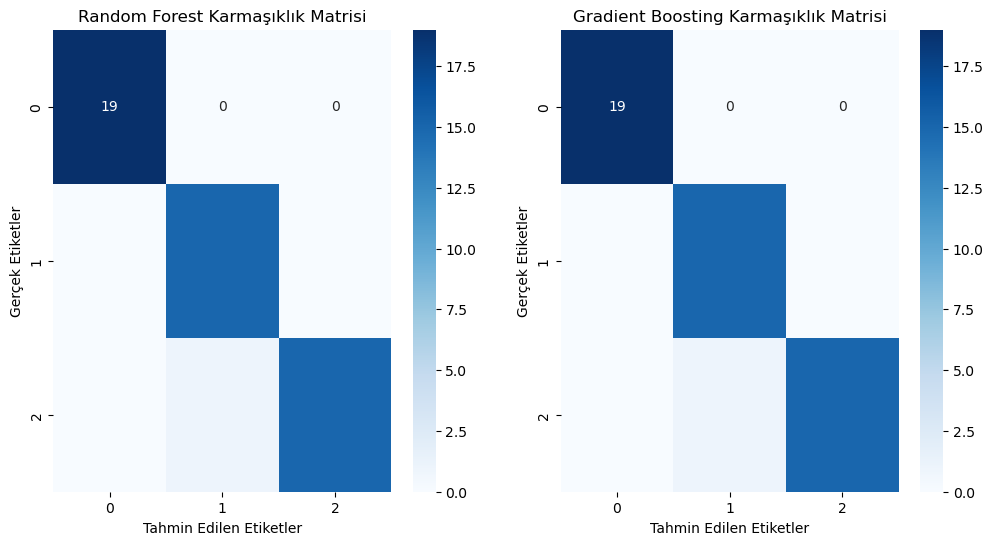

In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier()
rf_model.fit(X_egitim, y_egitim)


rf_y_egitim_tahmini = rf_model.predict(X_egitim)
rf_y_test_tahmini = rf_model.predict(X_test)
rf_egitim_basarimi = accuracy_score(y_egitim, rf_y_egitim_tahmini)
rf_test_basarimi = accuracy_score(y_test, rf_y_test_tahmini)


gb_model = GradientBoostingClassifier()
gb_model.fit(X_egitim, y_egitim)


gb_y_egitim_tahmini = gb_model.predict(X_egitim)
gb_y_test_tahmini = gb_model.predict(X_test)
gb_egitim_basarimi = accuracy_score(y_egitim, gb_y_egitim_tahmini)
gb_test_basarimi = accuracy_score(y_test, gb_y_test_tahmini)


print("Random Forest:")
print("Eğitim başarımı:", rf_egitim_basarimi)
print("Test başarımı:", rf_test_basarimi)

print("\nGradient Boosting:")
print("Eğitim başarımı:", gb_egitim_basarimi)
print("Test başarımı:", gb_test_basarimi)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
cm_rf = confusion_matrix(y_test, rf_y_test_tahmini)
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')

plt.subplot(1, 2, 2)
cm_gb = confusion_matrix(y_test, gb_y_test_tahmini)
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='g')
plt.title('Gradient Boosting Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')

plt.show()
